# COIN DETECTION

**Name :** CHANDRAPRIYADHARSHINI C

**Reg.No :** 212223240019

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
coin_image=cv2.imread("CoinsA.png")
coin_image_copy=coin_image.copy()

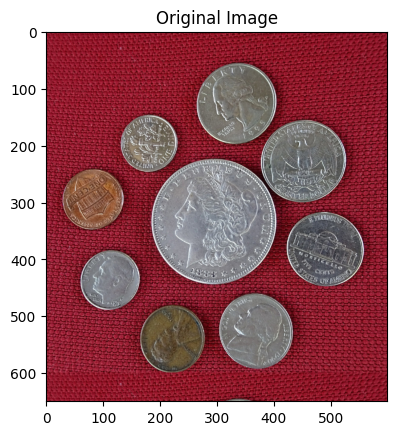

In [3]:
plt.imshow(coin_image[:,:,::-1])
plt.title("Original Image")
plt.show()

In [4]:
gray_coin_image=cv2.cvtColor(coin_image,cv2.COLOR_BGR2GRAY)

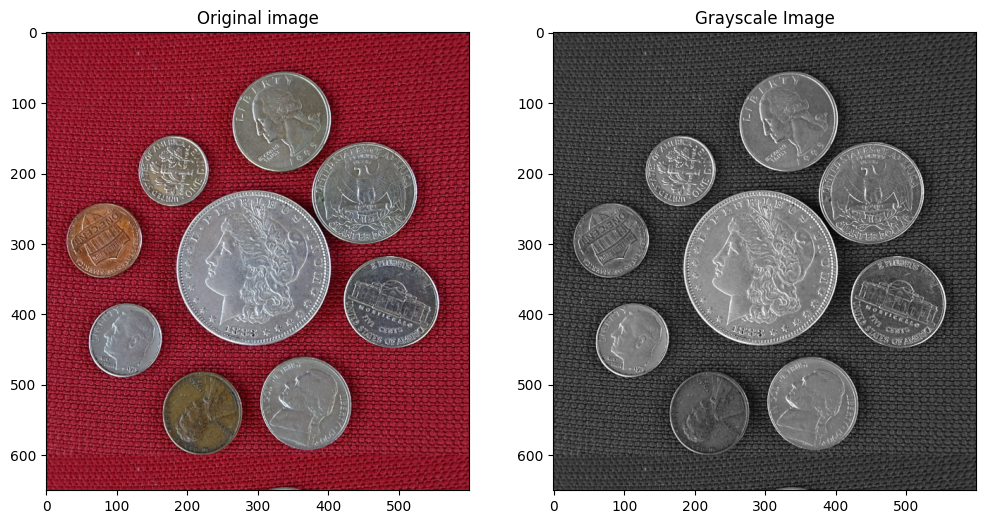

In [5]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(coin_image[:,:,::-1])
plt.title("Original image")
plt.subplot(122)
plt.imshow(gray_coin_image,cmap="gray")
plt.title("Grayscale Image")
plt.show()

In [6]:
Red_image, Green_image, Blue_image=cv2.split(coin_image)

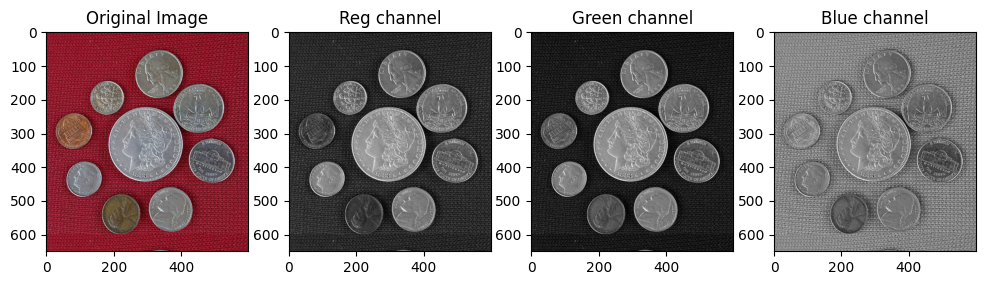

In [7]:
plt.figure(figsize=(12,12))
plt.subplot(141)
plt.imshow(coin_image[:,:,::-1])
plt.title("Original Image")

plt.subplot(142)
plt.imshow(Red_image,cmap="gray")
plt.title("Reg channel")

plt.subplot(143)
plt.imshow(Green_image,cmap="gray")
plt.title("Green channel")

plt.subplot(144)
plt.imshow(Blue_image,cmap="gray")
plt.title("Blue channel")

plt.show()

In [95]:
retval, thresholding_blue_image=cv2.threshold(Green_image, 38, 255, cv2.THRESH_BINARY_INV)

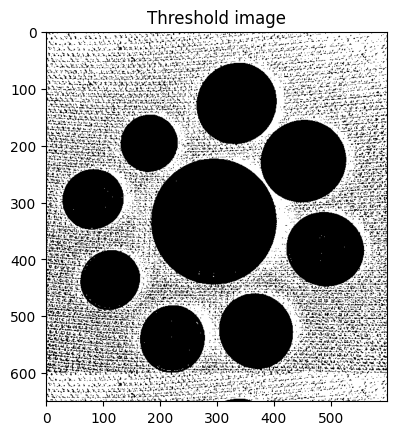

In [96]:
plt.imshow(thresholding_blue_image, cmap="gray")
plt.title("Threshold image")
plt.show()

In [97]:
kernel=np.ones((3,3))

In [98]:
dilation_image=cv2.dilate(thresholding_blue_image, kernel, iterations=1)
dilation_image2=cv2.dilate(thresholding_blue_image, kernel, iterations=2)
erosion_image=cv2.erode(dilation_image2, kernel, iterations=2)

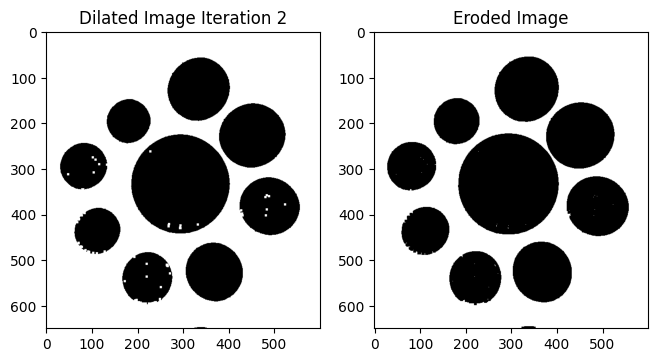

In [99]:
plt.figure(figsize=(12,12))
plt.subplot(131)
plt.imshow(dilation_image2, cmap="gray")
plt.title("Dilated Image Iteration 2")

plt.subplot(132)
plt.imshow(erosion_image, cmap="gray")
plt.title("Eroded Image")
plt.show()

In [100]:
params = cv2.SimpleBlobDetector_Params()
params.blobColor = 0
params.minDistBetweenBlobs = 2
params.filterByArea = False
params.filterByCircularity = True
params.minCircularity = 0.8
params.filterByConvexity = True
params.minConvexity = 0.8
params.filterByInertia = True
params.minInertiaRatio = 0.8

In [101]:
detector = cv2.SimpleBlobDetector_create(params)

In [102]:
keypoints = detector.detect(erosion_image)

In [103]:
print(f"Number of coins detected: {len(keypoints)}")

Number of coins detected: 8


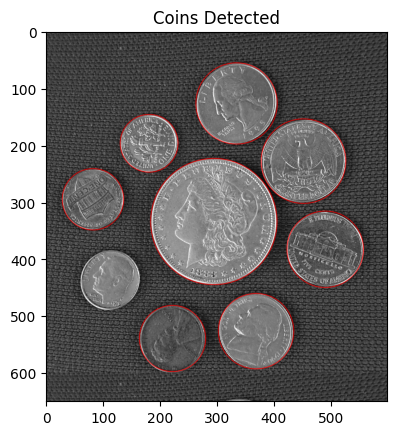

In [104]:
final_image = cv2.drawKeypoints(gray_coin_image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(final_image[:,:,::-1])
plt.title("Coins Detected")
plt.show()